# Loan Data from Prosper
## by Ghada Bin Muhareb

## Preliminary Wrangling

> This data set [Prosper Loan Data](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1608504051214000&usg=AOvVaw31QWd3HsqHYGkzXZGIRNRL) contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This [linke](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) includes a discription of the variables in the data set, and only few of them are gonna be explored.

## Questions
> ##### 1. What is the structure of your dataset?
>##### 2. What is/are the main feature(s) of interest in your dataset?
>##### 3. What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>##### 4. How is the Correlations between quantitaive variables?
>##### 5. How can the Prosper rating affect the Anuual Percentage Rate (APR)?
>##### 7. Does the Loan Amount have a role to decrease the Annual Percentage Rate (APR)?
>##### 8. How is the Employment status of the borrowers is distributed regarding the relationship between Prosper rating and Borrower APR?
>##### 9. Is there an interaction between Loan status and Borrower APR regarding length of term?
>##### 10. Does the Loan Original Amount correlate with the Prosper rating and the length of term?
>##### 11. Is there any relationship between The Estimated Return and Borrower APR considering each type of the Prosper rating? 
>##### 12. What is the effection of Loan Original Amount on Borrower APR and Prosper Rating?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load data
prosper_loan = pd.read_csv('prosperLoanData.csv')
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper_loan.shape

(113937, 81)

In [4]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
prosper_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### 1. What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### 2. What is/are the main feature(s) of interest in your dataset?

> I'm interested to investigate what features are good to predict the borrower's Annual Percentage Rate (BorrowerAPR).

### 3. What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the BorrowerRate, ProsperRating, Term of the loan, EmploymentStatus, StatedMonthlyIncome, LoanOriginalAmount will have an impact on the BorrowerAPR and support my investigation.

In [6]:
#take a subset of the dataset
keys = ['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate']

In [7]:
loans = prosper_loan[keys]
loans.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,NaN,NaN,NaN,Self-employed,True,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,0.05470,A,7.0,Employed,False,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,NaN,NaN,NaN,Not available,False,Not displayed,2083.333333,3001,2007-01-17 00:00:00
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,0.06000,A,9.0,Employed,True,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,0.09066,D,4.0,Employed,True,"$100,000+",9583.333333,15000,2013-09-20 00:00:00


**The description of the values in the column "Prosper Rating" in numerics:**

* 0 - N/A
* 1 - HR
* 2 - E
* 3 - D
* 4 - C
* 5 - B
* 6 - A
* 7 - AA

In [8]:
loans.duplicated().any()

False

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingKey             113937 non-null  object 
 1   ListingCreationDate    113937 non-null  object 
 2   CreditGrade            28953 non-null   object 
 3   Term                   113937 non-null  int64  
 4   LoanStatus             113937 non-null  object 
 5   BorrowerAPR            113912 non-null  float64
 6   BorrowerRate           113937 non-null  float64
 7   EstimatedReturn        84853 non-null   float64
 8   ProsperRating (Alpha)  84853 non-null   object 
 9   ProsperScore           84853 non-null   float64
 10  EmploymentStatus       111682 non-null  object 
 11  IsBorrowerHomeowner    113937 non-null  bool   
 12  IncomeRange            113937 non-null  object 
 13  StatedMonthlyIncome    113937 non-null  float64
 14  LoanOriginalAmount     113937 non-nu

In [10]:
# Convert the variables "ListingCreationDate" and "LoanOriginationDate" to datetime type
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

<ipython-input-10-18185166695a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])
<ipython-input-10-18185166695a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])


In [11]:
#Remove missing values in the column "BorrowerAPR"
loans = loans[loans['BorrowerAPR'].notna()]

In [12]:
#Change the name of "ProsperRating (Alpha)"
loans = loans.rename(columns={'ProsperRating (Alpha)':'ProsperRating'})

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingKey           113912 non-null  object        
 1   ListingCreationDate  113912 non-null  datetime64[ns]
 2   CreditGrade          28928 non-null   object        
 3   Term                 113912 non-null  int64         
 4   LoanStatus           113912 non-null  object        
 5   BorrowerAPR          113912 non-null  float64       
 6   BorrowerRate         113912 non-null  float64       
 7   EstimatedReturn      84853 non-null   float64       
 8   ProsperRating        84853 non-null   object        
 9   ProsperScore         84853 non-null   float64       
 10  EmploymentStatus     111682 non-null  object        
 11  IsBorrowerHomeowner  113912 non-null  bool          
 12  IncomeRange          113912 non-null  object        
 13  StatedMonthlyI

In [14]:
loans.IsBorrowerHomeowner.value_counts()

True     57478
False    56434
Name: IsBorrowerHomeowner, dtype: int64

In [15]:
loans['ProsperRating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

In [16]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7716
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [17]:
loans.describe()

,Term,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperScore,StatedMonthlyIncome,LoanOriginalAmount
count,113912.000000,113912.000000,113912.000000,84853.000000,84853.000000,1.139120e+05,113912.000000
mean,40.831308,0.218828,0.192786,0.096068,5.950067,5.606973e+03,8338.015661
std,10.437112,0.080364,0.074809,0.030403,2.376501,7.478338e+03,6245.940592
min,12.000000,0.006530,0.000000,-0.182700,1.000000,0.000000e+00,1000.000000
25%,36.000000,0.156290,0.134000,0.074080,4.000000,3.200000e+03,4000.000000
50%,36.000000,0.209760,0.184000,0.091700,6.000000,4.666667e+03,6500.000000
75%,36.000000,0.283810,0.250000,0.116600,8.000000,6.817083e+03,12000.000000
max,60.000000,0.512290,0.497500,0.283700,11.000000,1.750003e+06,35000.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

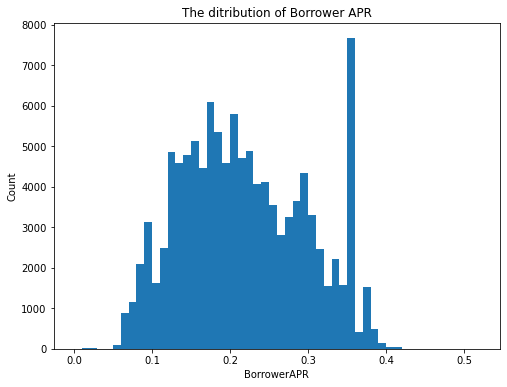

In [18]:
bins = np.arange(0, loans['BorrowerAPR'].max()+0.01, 0.01)
plt.figure(figsize=[8,6])
plt.hist(data=loans, x='BorrowerAPR', bins=bins)
plt.title('The ditribution of Borrower APR')
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');

The chart above shwos that the distribution of the APR looks multimodal. There is a small peak around 0.1, at 0.2 there is a larger peak, at 0.3 we also have a small peak. Looking at the point between 0.35 and 0.36 we will find a very sharp peak. There are only few loans with APR greater than 0.4.

In [19]:
loans.Term.value_counts()

36    87753
60    24545
12     1614
Name: Term, dtype: int64

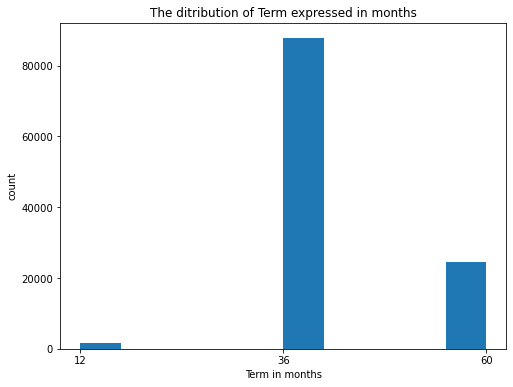

In [20]:
plt.figure(figsize=[8,6])
plt.hist(data=loans, x='Term')
plt.title('The ditribution of Term expressed in months')
plt.xlabel('Term in months');
ticks = [12, 36, 60]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.ylabel('count');

Most of the loans have a length of 36 months.

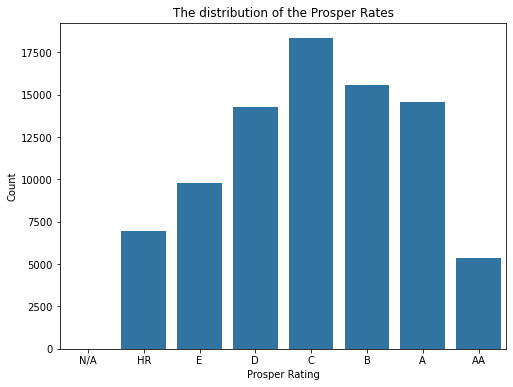

In [21]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,6])
sb.countplot(data=loans, x='ProsperRating', color=base_color, order=['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']);
plt.title('The distribution of the Prosper Rates');
plt.xlabel('Prosper Rating');
plt.ylabel('Count');

Most of the borrowers have a rating of C and we can say most of them fall within the range D-A. 

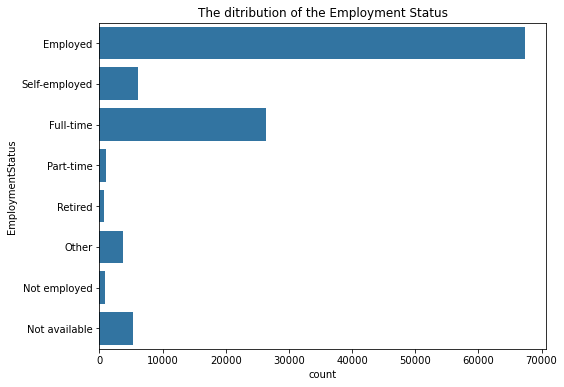

In [22]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,6])
sb.countplot(data=loans, y='EmploymentStatus', color=base_color, order=['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not employed', 'Not available'])
plt.title('The ditribution of the Employment Status');

Obviously, Most of the borrowers are employed and most of those who are employed are full-time.

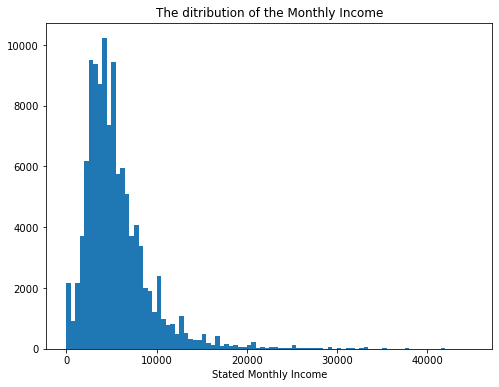

In [23]:
bins = np.arange(0, 45000+500,500)
plt.figure(figsize=[8,6])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins)
plt.title('The ditribution of the Monthly Income')
plt.xlabel('Stated Monthly Income');

The distribution of the stated monthly income looks right skewed and most of the stated monthly income are less than 30,000

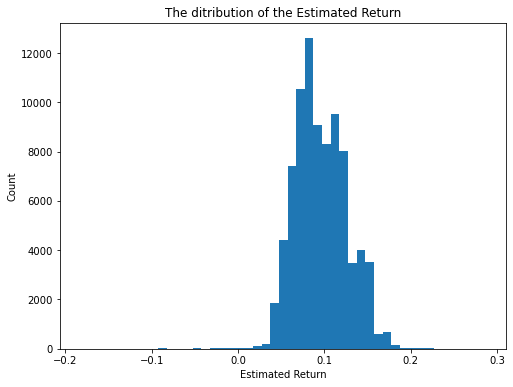

In [24]:
bins = np.arange(-0.182700, loans['EstimatedReturn'].max()+0.01,0.01)
plt.figure(figsize=[8,6])
plt.hist(data=loans, x='EstimatedReturn', bins=bins)
plt.title('The ditribution of the Estimated Return')
plt.xlabel('Estimated Return');
plt.ylabel('Count');

The Estimated Return looks normally distributed, the highest Estimated Return is centered at 0.08 and there is very few loans with Estimated Return less than zero. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrower APR seems multimodal. Most of the points are located within the range of 0.05 and 0.42. No, there are no unusual points and no need for transformations.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the borrowers are as expected employed and the stated monthly income of some of the borrowers is incredibly high and greater than 30,000 which can be considered as outliers. No operations are performed on the data and no need for transformation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [25]:
loans[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,113912.000000,113912.000000
mean,0.218828,0.192786
std,0.080364,0.074809
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209760,0.184000
75%,0.283810,0.250000
max,0.512290,0.497500


### 4. How is the Correlations between quantitaive variables

In [27]:
Num_vars = ['BorrowerAPR', 'BorrowerRate','EstimatedReturn', 'ProsperScore', 'StatedMonthlyIncome', 'LoanOriginalAmount']

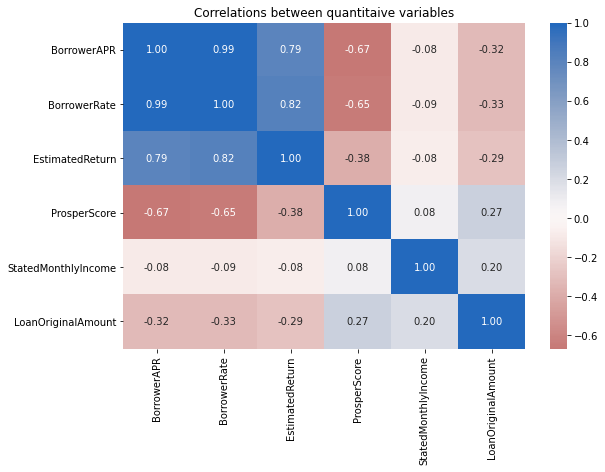

In [28]:
plt.figure(figsize = [9, 6])
ax = plt.axes()
sb.heatmap(loans[Num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, ax = ax)
ax.set_title('Correlations between quantitaive variables');
plt.show()

This heatmap summarize the relationships between quantitative variables in which it shows that there is a positive and negative relationships. 

### 5. How can the Prosper rating affect the Anuual Percentage Rate (APR)?

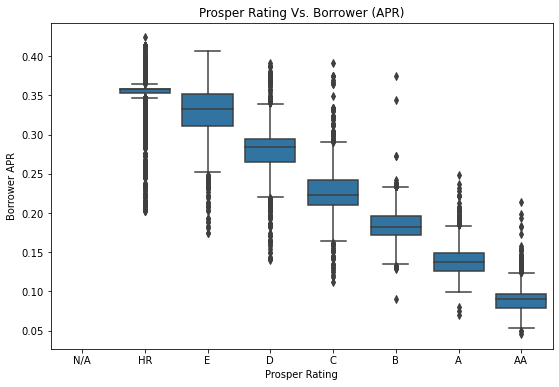

In [29]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[9,6])
rate_classes = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
rates = pd.api.types.CategoricalDtype(ordered=True, categories=rate_classes)
loans['ProsperRating'] = loans['ProsperRating'].astype(rates);
sb.boxplot(data=loans, x='ProsperRating', y='BorrowerAPR', color=base_color);
plt.title('Prosper Rating Vs. Borrower (APR)');
plt.xlabel('Prosper Rating');
plt.ylabel('Borrower APR');

There is a strong negative relationship between Prosper Rating and Borrower (APR), The higher ratings of the borrower lead to lower Annual Percentage rate (APR). 

### 6. Does the Loan Amount have a role to decrease the Annual Percentage Rate (APR)?

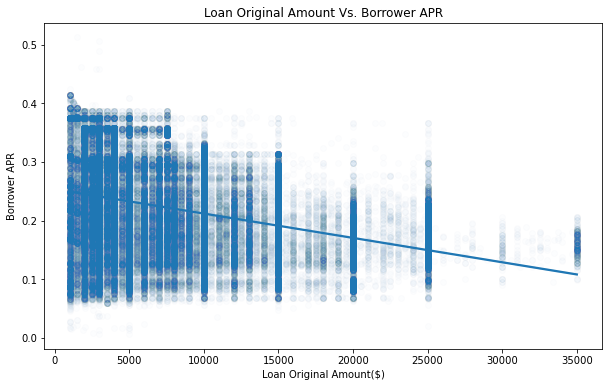

In [70]:
plt.figure(figsize=[10,6])
sb.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerAPR', x_jitter=0.9, scatter_kws={'alpha':0.01});
plt.title('Loan Original Amount Vs. Borrower APR');
plt.xlabel('Loan Original Amount($)');
plt.ylabel('Borrower APR');

There is a  negative relationship between the Loan Original Amount and the Borrower APR, as the original amount of the loan was high the Borrower annual percentage rate (APR) will be low. 

### 4. How the Prosper Ratings are distributed among Employment status and Income Range of the borrowers? 

In [31]:
#ProsperRating - EmploymentStatus
ct_counts= loans.groupby([ 'EmploymentStatus' ,'ProsperRating' ]).size()
ct_counts

EmploymentStatus  ProsperRating
Employed          N/A                  0
                  HR                4609
                  E                 7402
                  D                11004
                  C                15002
                                   ...  
Self-employed     D                  750
                  C                 1020
                  B                  679
                  A                  601
                  AA                 173
Length: 64, dtype: int64

In [32]:
ct_counts = ct_counts.reset_index(name= 'count')
ct_counts

,EmploymentStatus,ProsperRating,count
0,Employed,N/A,0
1,Employed,HR,4609
2,Employed,E,7402
3,Employed,D,11004
4,Employed,C,15002
...,...,...,...
59,Self-employed,D,750
60,Self-employed,C,1020
61,Self-employed,B,679
62,Self-employed,A,601


In [33]:
ct_counts = ct_counts.pivot(index = 'ProsperRating' , columns = 'EmploymentStatus' , values = 'count')
ct_counts

EmploymentStatus,Employed,Full-time,Not available,Not employed,Other,Part-time,Retired,Self-employed
ProsperRating,,,,,,,,
N/A,0,0,0,0,0,0,0,0
HR,4609,893,0,201,491,32,53,656
E,7402,926,0,130,582,46,50,659
D,11004,1533,0,132,714,55,86,750
C,15002,1289,0,82,868,30,54,1020
B,13507,681,0,53,600,22,39,679
A,11629,1739,0,46,425,55,56,601
AA,4157,866,0,5,126,16,29,173


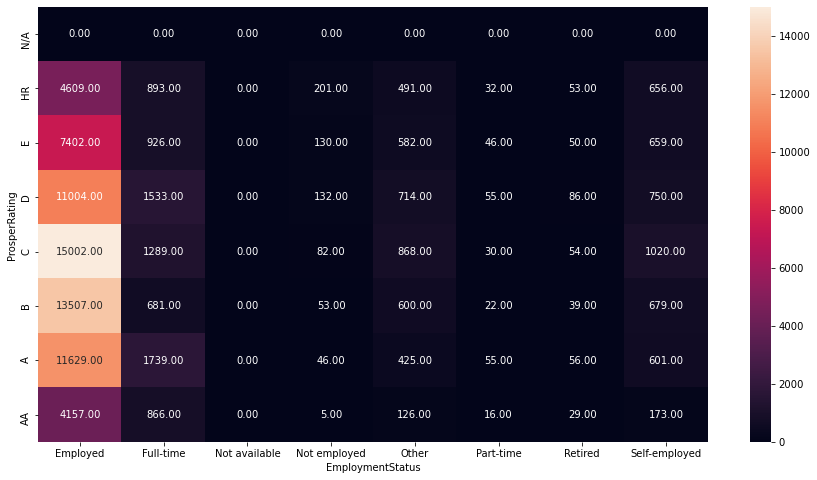

In [34]:
plt.figure(figsize = [15,8])
sb.heatmap(ct_counts , annot =True , fmt = '.2f');

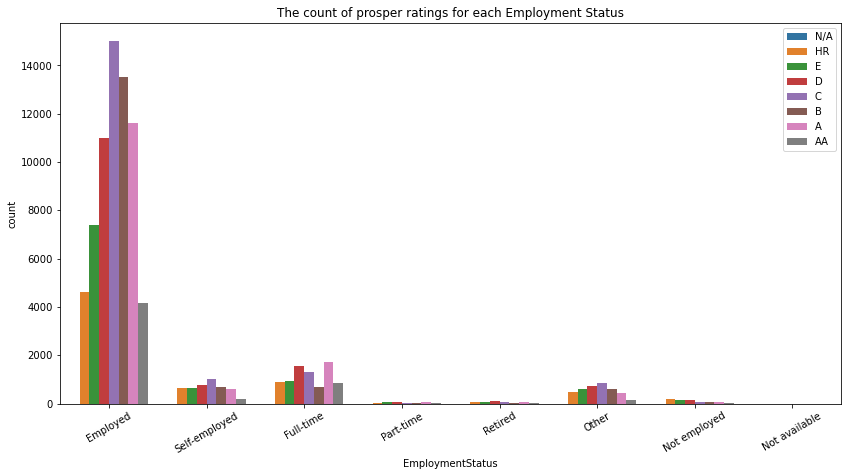

In [35]:
plt.figure(figsize = [14,7])
sb.countplot(data = loans, x = 'EmploymentStatus' , hue = 'ProsperRating', 
             order=['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not employed', 'Not available']);
plt.xticks(rotation=30);
plt.legend(loc='upper right');
plt.title('The count of prosper ratings for each Employment Status');

Most of the borrowers are as shown before employed and the rating (C) includes the largest group of the borrowers. (Part-time, Retired and Not employed) groups are the lowest for all types of rating.

In [36]:
#IncomeRange - ProsperRating
ct_counts_2= loans.groupby([ 'IncomeRange' ,'ProsperRating' ]).size()
ct_counts_2

IncomeRange   ProsperRating
$0            N/A                0
              HR                17
              E                  6
              D                 15
              C                  2
                              ... 
Not employed  D                132
              C                 82
              B                 53
              A                 46
              AA                 5
Length: 64, dtype: int64

In [37]:
ct_counts_2 = ct_counts_2.reset_index(name= 'count')
ct_counts_2

,IncomeRange,ProsperRating,count
0,$0,N/A,0
1,$0,HR,17
2,$0,E,6
3,$0,D,15
4,$0,C,2
...,...,...,...
59,Not employed,D,132
60,Not employed,C,82
61,Not employed,B,53
62,Not employed,A,46


In [38]:
ct_counts_2 = ct_counts_2.pivot(index = 'ProsperRating' , columns = 'IncomeRange' , values = 'count')
ct_counts_2

IncomeRange,$0,"$1-24,999","$100,000+","$25,000-49,999","$50,000-74,999","$75,000-99,999",Not displayed,Not employed
ProsperRating,,,,,,,,
N/A,0,0,0,0,0,0,0,0
HR,17,912,661,2560,1764,820,0,201
E,6,871,1044,3622,2793,1329,0,130
D,15,1049,1735,5114,4133,2096,0,132
C,2,839,2981,5332,5970,3139,0,82
B,3,517,3410,3780,4861,2957,0,53
A,2,378,3555,3031,4609,2930,0,46
AA,0,88,1819,736,1497,1227,0,5


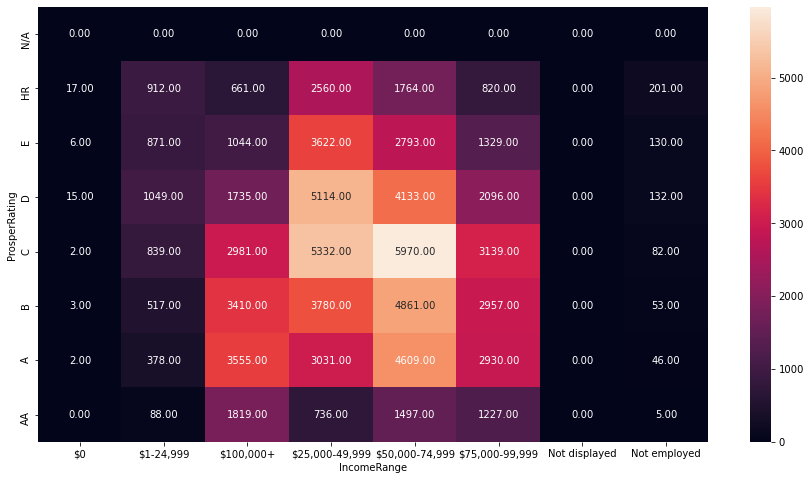

In [39]:
plt.figure(figsize = [15,8])
sb.heatmap(ct_counts_2 , annot =True , fmt = '.2f');

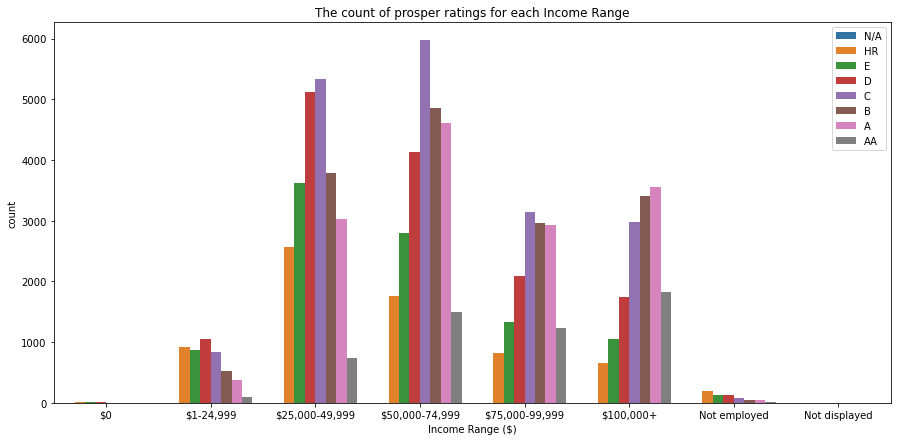

In [40]:
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
plt.figure(figsize = [15,7])
sb.countplot(data = loans, x = 'IncomeRange' , hue = 'ProsperRating', order=order);
plt.legend(loc='upper right');
plt.xlabel('Income Range ($)');
plt.title('The count of prosper ratings for each Income Range');

Most of the borrower ratings are located within the income range 25,000-49,999 to 50,000-74,999, some of them are greater than 74,999 and only very few of them are located in the income range 1-24,999.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a negative relationship between Prosper Rating of the borrowers and Borrower Anuual Percentage Reate (APR), so the highest rating the borrower has the lowest Anuual Percentage Reate (APR) the boorwoer will have. 
> The Loan Original Amount has an impact on the Borrower Annual Percentage Rate (APR), in which increasing Loan Original Amount will decrease Anuual Percentage Reate (APR).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a relationship between Employment Status and Prosper Rating, in which most of the Prosper Rating of borrowers are more likely to be Employed, since the Employed borrowers are the highest group.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 8. How is the Employment status of the borrowers is distributed regarding the relationship between Prosper rating and Borrower APR?

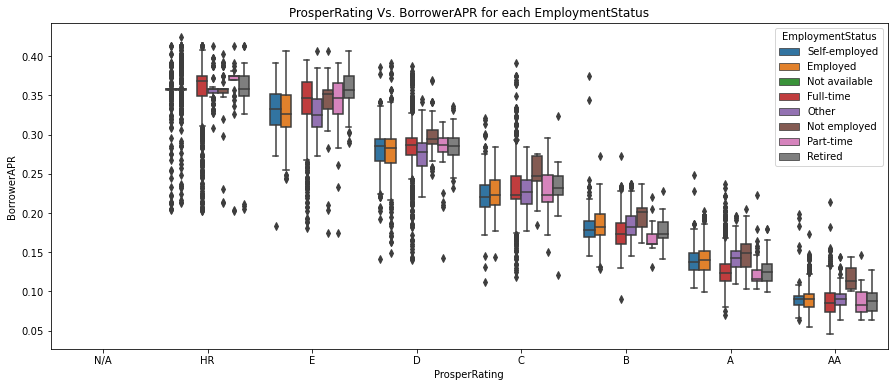

In [41]:
plt.figure(figsize=[15,6])
sb.boxplot(data = loans, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'EmploymentStatus');
plt.title('ProsperRating Vs. BorrowerAPR for each EmploymentStatus');

There is a strong negative relationship between Prosper Rating and Borrower (APR), The higher ratings of the borrower lead to lower Annual Percentage rate (APR). Employed and self-employed are the largest groups in the ratings E,D and C.

### 9. Is there an interaction between Loan status and Borrower APR regarding length of term?

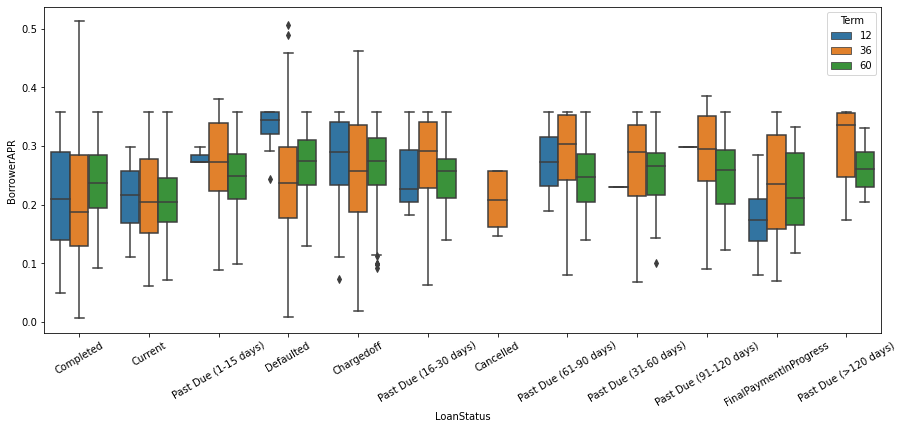

In [42]:
plt.figure(figsize=[15,6])
sb.boxplot(data = loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term');
plt.xticks(rotation=30);

Completed loans are the lowest Annual Percentage Rate (APR).

### 10. Does the Loan Original Amount correlate with the Prosper rating and the length of term?

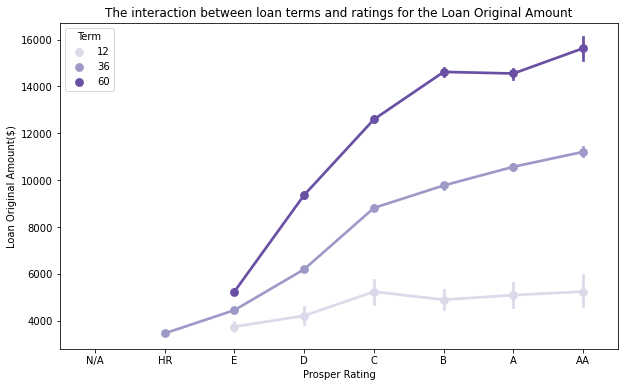

In [49]:
plt.figure(figsize=[10,6])
sb.pointplot(data = loans, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples');
plt.title('The interaction between loan terms and ratings for the Loan Original Amount');
plt.xlabel('Prosper Rating');
plt.ylabel('Loan Original Amount($)');

There is an obvious interaction between loan terms and ratings. As much as the Prosper ratings getting higher or better, the loan original amount of all three loan terms getting increased, since the loan original amount increased the term of loans also increases.

### 11. Is there any relationship between The Estimated Return and Borrower APR considering each type of the Prosper rating? 

C:\Users\gad17\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


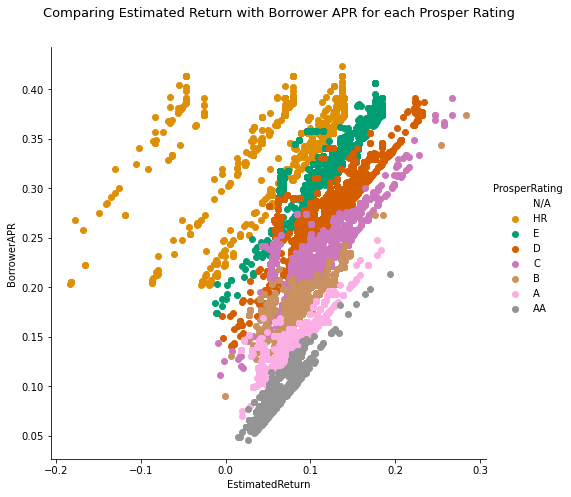

In [44]:
g = sb.FacetGrid(data = loans, hue = 'ProsperRating', size = 7,
                 palette = 'colorblind');
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerAPR');
g.add_legend();
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparing Estimated Return with Borrower APR for each Prosper Rating', fontsize=13);

The highest ratings of the borrower is the lowest Annual Percentage Rate (APR) with almost the same estimatd return, except the lowest rating (HR) which has lower estimatd return and higher Annual Percentage Rate (APR). 

### 12. What is the effection of Loan Original Amount on Borrower APR and Prosper Rating?

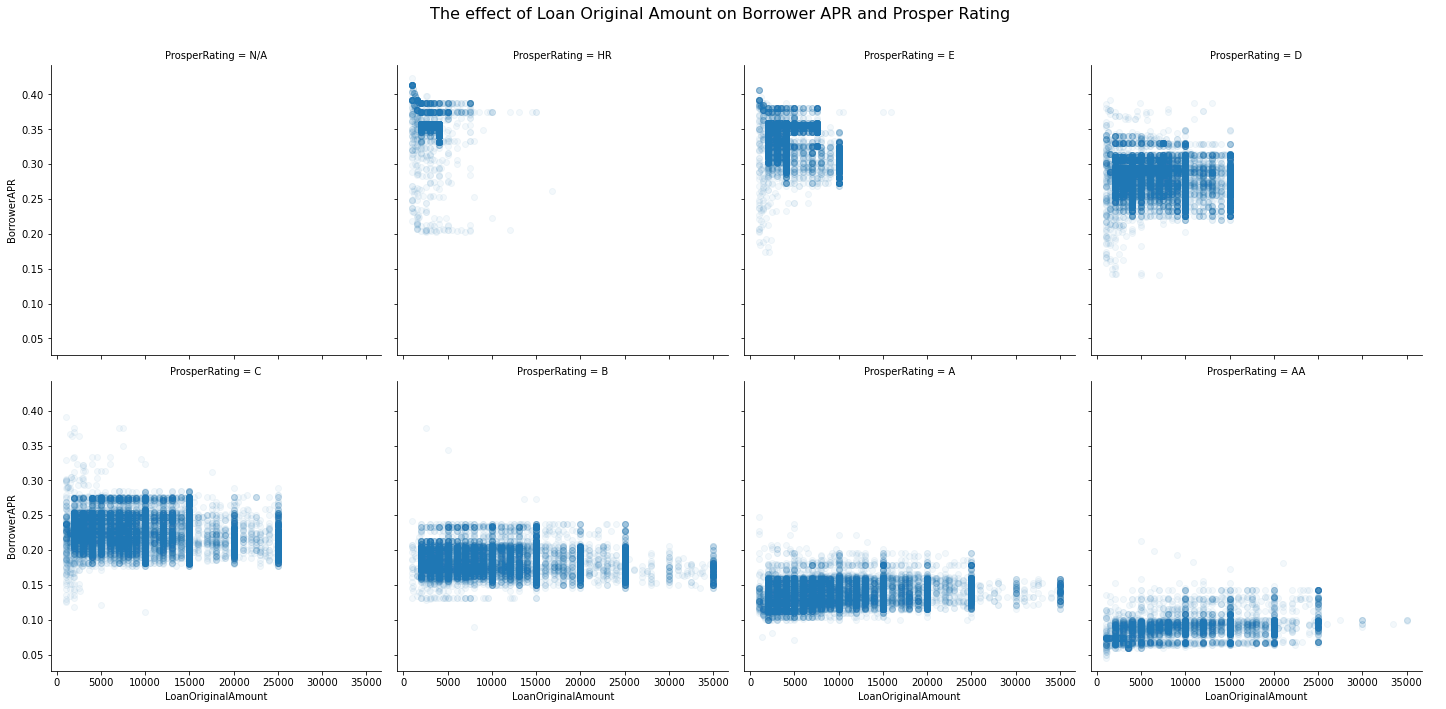

In [80]:
g=sb.FacetGrid(data=loans, col='ProsperRating', size=5, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.05);
g.add_legend();
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The effect of Loan Original Amount on Borrower APR and Prosper Rating', fontsize=16);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The highest ratings of the borrower is the lowest Annual Percentage Rate (APR) with almost the same estimatd return, except the lowest rating (HR) which has lower estimatd return and higher Annual Percentage Rate (APR).
> The highest Estimated Return acheived almost in the Ratings (E,D and C).

### Were there any interesting or surprising interactions between features?

> There is an interaction between loan terms, ratings and loan original amount. As much as the Prosper ratings getting higher, the loan original amount getting increased for all three terms of loan, since the loan original amount increased the term of loans also increases.

### Key Insights
> * As much as the borrowers choose a higher loan original amount this will contribute to decrease the Anuual
 Percentage Reate (APR).
> * Higher prosper ratings of borrowers allow for larger loan original amount and longer term. 
> * Lower prosper ratings lead to higher Annual Percentage Rate (APR).
>* The highest Estimated Return acheived almost in the Ratings (E,D and C).